# Импорт библиотек

In [169]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
df = pd.read_csv('divorce.csv', delimiter=';')

# Обработка данных

In [170]:
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


Датасет содержит данные от 170 опрошенных людей. Каждый столбец соответствует оценке утверждения, указанной в анкете, от 1 (никогда) до 5 (всегда). Последний столбец - класс 1 (married) или 0 (divorced). Таким образом, на основании этих данных можно предсказать потенциальный развод.

### Вопросы из анкеты



    When one of our apologies apologizes when our discussions go in a bad direction, the issue does not extend.
    I know we can ignore our differences, even if things get hard sometimes.
    When we need it, we can take our discussions with my wife from the beginning and correct it.
    When I argue with my wife, it will eventually work for me to contact him.
    The time I spent with my wife is special for us.
    We don't have time at home as partners.
    We are like two strangers who share the same environment at home rather than family.
    I enjoy our holidays with my wife.
    I enjoy traveling with my wife.
    My wife and most of our goals are common.
    I think that one day in the future, when I look back, I see that my wife and I are in harmony with each other.
    My wife and I have similar values in terms of personal freedom.
    My husband and I have similar entertainment.
    Most of our goals for people (children, friends, etc.) are the same.
    Our dreams of living with my wife are similar and harmonious
    We're compatible with my wife about what love should be
    We share the same views with my wife about being happy in your life
    My wife and I have similar ideas about how marriage should be
    My wife and I have similar ideas about how roles should be in marriage
    My wife and I have similar values in trust
    I know exactly what my wife likes.
    I know how my wife wants to be taken care of when she's sick.
    I know my wife's favorite food.
    I can tell you what kind of stress my wife is facing in her life.
    I have knowledge of my wife's inner world.
    I know my wife's basic concerns.
    I know what my wife's current sources of stress are.
    I know my wife's hopes and wishes.
    I know my wife very well.
    I know my wife's friends and their social relationships.
    I feel aggressive when I argue with my wife.
    When discussing with my wife, I usually use expressions such as …..
    I can use negative statements about my wife's personality during our discussions.
    I can use offensive expressions during our discussions.
    I can insult our discussions.
    I can be humiliating when we argue.
    My argument with my wife is not calm.
    I hate my wife's way of bringing it up.
    Fights often occur suddenly.
    We're just starting a fight before I know what's going on.
    When I talk to my wife about something, my calm suddenly breaks.
    When I argue with my wife, it only snaps in and I don't say a word.
    I'm mostly thirsty to calm the environment a little bit.
    Sometimes I think it's good for me to leave home for a while.
    I'd rather stay silent than argue with my wife.
    Even if I'm right in the argument, I'm thirsty not to upset the other side.
    When I argue with my wife, I remain silent because I am afraid of not being able to control my anger.
    I feel right in our discussions.
    I have nothing to do with what I've been accused of.
    I'm not actually the one who's guilty about what I'm accused of.
    I'm not the one who's wrong about problems at home.
    I wouldn't hesitate to tell her about my wife's inadequacy.
    When I discuss it, I remind her of my wife's inadequate issues.
    I'm not afraid to tell her about my wife's incompetence.


### Исследование ответов

<Axes: >

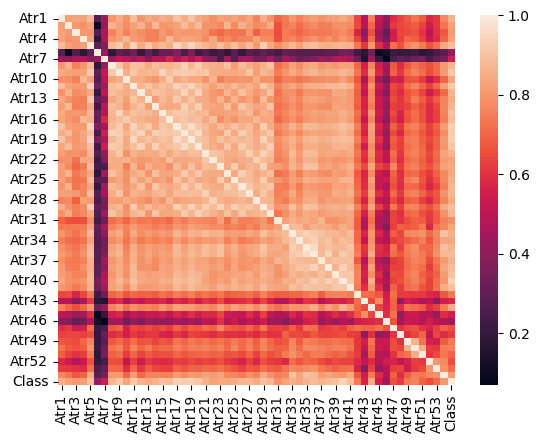

In [171]:
sns.heatmap(df.corr())

Из корреляционной матрицы видно, что подавляющее большинство ответов положительно коррелирует с откликом и между собой. Это происходит, потому что эти вопросы имеют положительный характер, то есть оценка в 5 (всегда) почти во всех случаях соответствует позитивному положению дел в доме.

Однако, количество признаков очень велико, что заметно утяжелит нашу модель. С такой высокой степенью корреляции будет логично воспользоваться уменьшением размерности при помощи PCA.

# Обучение моделей

 Исследуем разное количество компонент для выбора оптимального варианта.

In [172]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df.Class, test_size=0.25, stratify=df.Class)

components = []
variance = []
for n in range(5, 55):
    pca = PCA(svd_solver='full', n_components=n)
    pca.fit(x_train, y_train)
    components.append(n)
    variance.append(pca.explained_variance_ratio_.sum())

<Axes: >

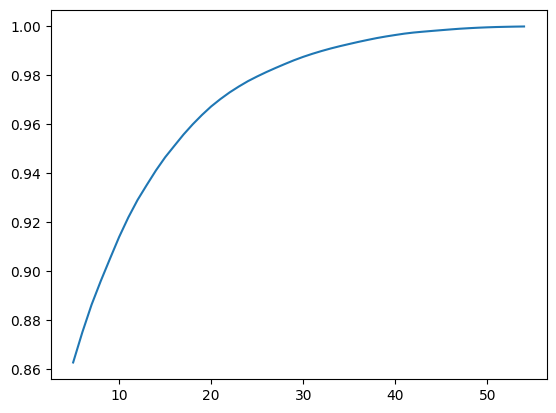

In [173]:
sns.lineplot(x=components, y=variance)

In [174]:
variance[0:9]

[0.8627693683133978,
 0.875100499496403,
 0.8863345727751802,
 0.8960309132035267,
 0.9051208864237164,
 0.9140483034742658,
 0.9220407581026872,
 0.9291437621028071,
 0.9352695206924255]

Видно, что даже при использовании 5 главных компонент доля объясненной дисперсии превышает порог в 0.9. Остановимся на 5 компонентах и опробуем разные классификаторы.

In [175]:
pca2 = PCA(svd_solver='full', n_components=5)
pca2.fit(x_train, y_train)

x_trainsformed = pca2.transform(x_train)
x_testformed = pca2.transform(x_test)

models = [KNeighborsClassifier(n_neighbors=3), LogisticRegression(random_state=5), SVC(random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=5)]

In [176]:
for model in models:
    model.fit(x_trainsformed, y_train)
    pred = model.predict(x_testformed)
    print(f1_score(y_test, pred))

1.0
1.0
0.975609756097561
1.0


Видно, что все модели показывают отличные результаты, а дерево принятия решений даже имеет вероятный оверфит. Это закономерно, потому что размер датасета довольно мал, и оценить шанс развода исходя из ответов на представленные вопросы очень легко вследствие высокой коррелированности. Тем не менее, такая коррелированность дает высокую уверенность в результатах предсказаний даже на таком маленьком датасете.